[View in Colaboratory](https://colab.research.google.com/github/thimotio/ExpertSystem/blob/master/Fuzzy_ExperSystem_Stocks.ipynb)

# IHM APC - SISTEMA ESPECIALISTA PARA CONTROLE DE PROCESSO

## CASO DE USO: BRITAGEM E PENEIRAMENTO - VALE ITM-I

- VERSÃO 01.00.03

In [0]:
!pip install plotly
!pip install pandas_datareader
!pip install quandl

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas_datareader as web
from datetime import datetime
import quandl

# Package imports
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='edumaga', api_key='9l9xEF6IA70WJr3iNf9s')
import plotly.plotly as py
import plotly.graph_objs as go

np.random.seed(7) # set a seed so that the results are consistent

In [0]:
!pip install alpha_vantage

In [0]:

import ta as TA
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib as mpl
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

# Package imports
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='edumaga', api_key='9l9xEF6IA70WJr3iNf9s')
import plotly.plotly as py
import plotly.graph_objs as go

np.random.seed(7) # set a seed so that the results are consistent

ts = TimeSeries(key='DEA58JD6OKHAJFUY', output_format='pandas')
data, meta_data = ts.get_daily(symbol='petr4.sa', outputsize='full')


In [6]:


import plotly.plotly as py
import plotly.graph_objs as go

from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

# Package imports
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='edumaga', api_key='9l9xEF6IA70WJr3iNf9s')
import plotly.plotly as py
import plotly.graph_objs as go

np.random.seed(7) # set a seed so that the results are consistent

ts = TimeSeries(key='DEA58JD6OKHAJFUY', output_format='pandas')
data, meta_data = ts.get_daily(symbol='petr4.sa', outputsize='full')

close = data['4. close']
open = data['1. open']
low = data['3. low']
high = data['2. high']

trace = go.Candlestick(x=data.index,
                       open=open,
                       high=high,
                       low=low,
                       close=close)
grf = [trace]
py.iplot(grf, filename='simple_candlestick')


In [0]:
import ta as TA

start = '2018-01-01'
end = '2018-08-20'


In [0]:
import plotly
plotly.tools.set_credentials_file(username='edumaga', api_key='9l9xEF6IA70WJr3iNf9s')
import plotly.plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

stock = TA.add_all_ta_features(data, "1. open", "2. high", "3. low", "4. close", "5. volume", fillna=True)


df = stock.loc[start:end]



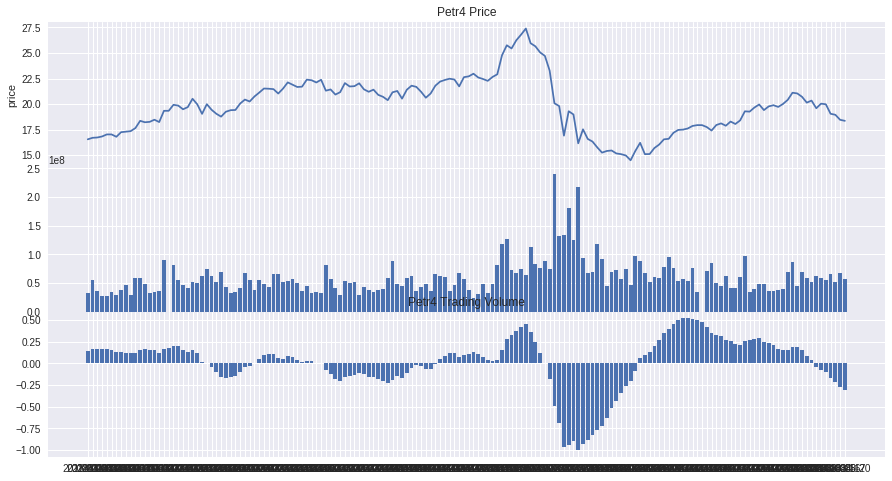

In [45]:

fig, axs = plt.subplots(3, 1, sharex=True)

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
#axs[0].plot(df['1. open'],  df['4. close'], df['2. high'], df['3. low'])
axs[0].plot(df['4. close'])
axs[0].set(title='Petr4 Price', ylabel='price')

axs[1].bar(df.index, df['5. volume'])

axs[2].bar(df.index, df['trend_macd_diff'])

plt.title('Petr4 Trading Volume')
plt.gcf().set_size_inches(15,8)
plt.show()

In [0]:
!pip   install  -U scikit-fuzzy

### Definição do Problema: 

> define as funções de pertinencia para os indicadores tecnicos

In [0]:
"Carregando modulos do Python"
import numpy as np
import skfuzzy as fuzz
import matplotlib 
import matplotlib.pyplot
from skfuzzy import control as ctrl


In [0]:
def NewAntecedentFuzzy_Exponencial(Name, vmin, vmax, precision, Curvas ):
    FuzzyVar = ctrl.Antecedent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        std = np.abs(vmax - vmin)/6
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, mean)
        FuzzyVar[Curvas[1]] = fuzz.gaussmf(FuzzyVar.universe, mean, std )
        FuzzyVar[Curvas[2]] = fuzz.smf(FuzzyVar.universe, mean, vmax)

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        std = np.abs(vmax - vmin)/12
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, quarter1)
        FuzzyVar[Curvas[1]] = fuzz.gaussmf(FuzzyVar.universe, quarter1, std )
        FuzzyVar[Curvas[2]] = fuzz.gaussmf(FuzzyVar.universe, mean, std )
        FuzzyVar[Curvas[3]] = fuzz.gaussmf(FuzzyVar.universe, quarter2, std )
        FuzzyVar[Curvas[4]] = fuzz.smf(FuzzyVar.universe, quarter2, vmax)
    
    return FuzzyVar

In [0]:
def NewConsequentFuzzy_Exponencial(Name, vmin, vmax, precision, Curvas ):
    FuzzyVar = ctrl.Consequent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        std = np.abs(vmax - vmin)/6
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, mean)
        FuzzyVar[Curvas[1]] = fuzz.gaussmf(FuzzyVar.universe, mean, std )
        FuzzyVar[Curvas[2]] = fuzz.smf(FuzzyVar.universe, mean, vmax)

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        std = np.abs(vmax - vmin)/12
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, quarter1)
        FuzzyVar[Curvas[1]] = fuzz.gaussmf(FuzzyVar.universe, quarter1, std )
        FuzzyVar[Curvas[2]] = fuzz.gaussmf(FuzzyVar.universe, mean, std )
        FuzzyVar[Curvas[3]] = fuzz.gaussmf(FuzzyVar.universe, quarter2, std )
        FuzzyVar[Curvas[4]] = fuzz.smf(FuzzyVar.universe, quarter2, vmax)
    
    return FuzzyVar

### Define uma variável de entrada Fuzzy com distribuições triangular. 
> Exemplo de Uso

<pre>
Names = ['MBaixo','Baixo', 'Neutro', 'Alto','MAlto']
inc_Taxa_Alm = NewConsequenceFuzzy_Triangular("inc_Taxa_Alm", -10, 10, 0.05, Names)
inc_Taxa_Alm.view()
</pre>


In [0]:
def NewConsequenceFuzzy_Triangular(Name, vmin, vmax, precision, Curvas ):
    #define the new  Fuzzy Variabel and set 
    FuzzyVar = ctrl.Consequent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        FuzzyVar[Curvas[0]] = fuzz.trimf(FuzzyVar.universe, [vmin, vmin, mean] )
        FuzzyVar[Curvas[1]] = fuzz.trimf(FuzzyVar.universe, [vmin, mean, vmax] )
        FuzzyVar[Curvas[2]] = fuzz.trimf(FuzzyVar.universe, [mean, vmax, vmax] )

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        FuzzyVar[Curvas[0]] = fuzz.trimf(FuzzyVar.universe, [vmin, vmin, quarter1])
        FuzzyVar[Curvas[1]] = fuzz.trimf(FuzzyVar.universe, [vmin, quarter1, mean] )
        FuzzyVar[Curvas[2]] = fuzz.trimf(FuzzyVar.universe, [quarter1, mean, quarter2] )
        FuzzyVar[Curvas[3]] = fuzz.trimf(FuzzyVar.universe, [mean, quarter2, vmax] )
        FuzzyVar[Curvas[4]] = fuzz.trimf(FuzzyVar.universe, [quarter2, vmax, vmax] )
           
    
    return FuzzyVar

In [0]:
def NewAntecedentFuzzy_Triangular(Name, vmin, vmax, precision, Curvas ):
    #define the new  Fuzzy Variabel and set 
    FuzzyVar = ctrl.Antecedent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        FuzzyVar[Curvas[0]] = fuzz.trimf(FuzzyVar.universe, [vmin, vmin, mean] )
        FuzzyVar[Curvas[1]] = fuzz.trimf(FuzzyVar.universe, [vmin, mean, vmax] )
        FuzzyVar[Curvas[2]] = fuzz.trimf(FuzzyVar.universe, [mean, vmax, vmax] )

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        FuzzyVar[Curvas[0]] = fuzz.trimf(FuzzyVar.universe, [vmin, vmin, quarter1])
        FuzzyVar[Curvas[1]] = fuzz.trimf(FuzzyVar.universe, [vmin, quarter1, mean] )
        FuzzyVar[Curvas[2]] = fuzz.trimf(FuzzyVar.universe, [quarter1, mean, quarter2] )
        FuzzyVar[Curvas[3]] = fuzz.trimf(FuzzyVar.universe, [mean, quarter2, vmax] )
        FuzzyVar[Curvas[4]] = fuzz.trimf(FuzzyVar.universe, [quarter2, vmax, vmax] )
           
    
    return FuzzyVar

In [0]:
def NewConsequenceFuzzy_Central(Name, vmin, vmax, around , precision, Curvas ):
    FuzzyVar = ctrl.Consequent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    around *= (vmax - vmin)
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        std = np.abs(vmax - vmin)/6
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, mean-around)
        FuzzyVar[Curvas[1]] = fuzz.pimf(FuzzyVar.universe, quarter1, mean-around, mean+around, quarter2 )
        FuzzyVar[Curvas[2]] = fuzz.smf(FuzzyVar.universe, mean+around, vmax)

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        std = np.abs(vmax - vmin)/12
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, quarter1)
        FuzzyVar[Curvas[1]] = fuzz.pimf(FuzzyVar.universe, vmin, quarter1, quarter1, mean-around)
        FuzzyVar[Curvas[2]] = fuzz.pimf(FuzzyVar.universe, quarter1, mean-around, mean+around, quarter2 )
        FuzzyVar[Curvas[3]] = fuzz.pimf(FuzzyVar.universe, mean+around, quarter2, quarter2 , vmax )
        FuzzyVar[Curvas[4]] = fuzz.smf(FuzzyVar.universe, quarter2, vmax)
    
    return FuzzyVar

In [0]:
def NewAntecedentFuzzy_Central(Name, vmin, vmax, around , precision, Curvas ):
    FuzzyVar = ctrl.Antecedent(np.arange(vmin, vmax, precision), Name);
    #if the MF has 3 membership functions
    around *= (vmax - vmin)
    if np.size(Curvas) == 3:
        mean = np.abs(vmax - vmin)/2 + vmin
        std = np.abs(vmax - vmin)/6
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, mean-around)
        FuzzyVar[Curvas[1]] = fuzz.pimf(FuzzyVar.universe, quarter1, mean-around, mean+around, quarter2 )
        FuzzyVar[Curvas[2]] = fuzz.smf(FuzzyVar.universe, mean+around, vmax)

    if np.size(Curvas) == 5:
        mean = np.abs(vmax - vmin)/2 + vmin
        quarter1 = np.abs(vmax - vmin)/4 + vmin
        quarter2 = np.abs(vmax - vmin)/4 + mean
        std = np.abs(vmax - vmin)/12
        FuzzyVar[Curvas[0]] = fuzz.zmf(FuzzyVar.universe, vmin, quarter1)
        FuzzyVar[Curvas[1]] = fuzz.pimf(FuzzyVar.universe, vmin, quarter1, quarter1, mean-around)
        FuzzyVar[Curvas[2]] = fuzz.pimf(FuzzyVar.universe, quarter1, mean-around, mean+around, quarter2 )
        FuzzyVar[Curvas[3]] = fuzz.pimf(FuzzyVar.universe, mean+around, quarter2, quarter2 , vmax )
        FuzzyVar[Curvas[4]] = fuzz.smf(FuzzyVar.universe, quarter2, vmax)
    
    return FuzzyVar

# VARIÁVEIS DO MODELO

In [0]:
#Imputs

Names = ['Baixo', 'Medio', 'Alto']
PriceBands = NewAntecedentFuzzy_Exponencial("PriceBands", -100, 100, 0.01 , Names)


Names = ['Reduzindo', 'Estavel', 'Aumentando']
MACD_Diff = NewAntecedentFuzzy_Central("MACD_Diff", -100, 100, 0.01, 0.1, Names)



#Outputs
Names = ['Vende_Forte', 'Vende', 'Hold', 'Compra', 'Compra_Forte']
Trade_01 = NewConsequenceFuzzy_Central("Trade_01", -100, 100, 0.1, 0.1, Names)



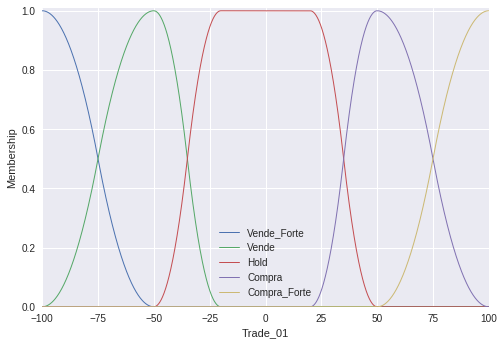

In [31]:
Trade_01.view()

In [0]:
rule1 = ctrl.Rule( PriceBands['Baixo'] & MACD_Diff['Reduzindo'], Trade_01['Vende_Forte'])  
rule2 = ctrl.Rule( PriceBands['Baixo'] & MACD_Diff['Estavel'], Trade_01['Vende'])  
rule3 = ctrl.Rule( PriceBands['Baixo'] & MACD_Diff['Aumentando'], Trade_01['Hold']) 

rule4 = ctrl.Rule( PriceBands['Medio'] & MACD_Diff['Reduzindo'], Trade_01['Vende'])  
rule5 = ctrl.Rule( PriceBands['Medio'] & MACD_Diff['Estavel'], Trade_01['Hold'])  
rule6 = ctrl.Rule( PriceBands['Medio'] & MACD_Diff['Aumentando'], Trade_01['Compra']) 

rule7 = ctrl.Rule( PriceBands['Alto'] & MACD_Diff['Reduzindo'], Trade_01['Hold'])  
rule8 = ctrl.Rule( PriceBands['Alto'] & MACD_Diff['Estavel'], Trade_01['Compra'])  
rule9 = ctrl.Rule( PriceBands['Alto'] & MACD_Diff['Aumentando'], Trade_01['Compra_Forte']) 

Rule_PriceBands = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                  rule6, rule7, rule8, rule9])


TradeSystem_01 = ctrl.ControlSystemSimulation(Rule_PriceBands)

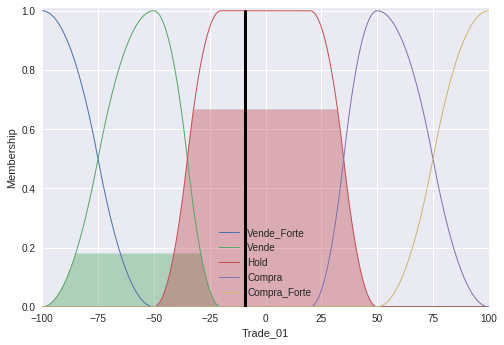

In [38]:
TradeSystem_01.input['PriceBands'] = -30
TradeSystem_01.input['MACD_Diff'] = 0
TradeSystem_01.compute()

Trade_01.view(sim=TradeSystem_01)


# Simulação do Controle

In [0]:
!pip install backtrader

In [0]:
from datetime import datetime
import backtrader as bt
import pandas as pd

date_str = '2011-12-01' # The date - 29 Dec 2017
format_str = '%Y-%m-%d' # The format

df.index = pd.to_datetime(df.index, format=format_str)

In [86]:
df.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10',
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-20'],
              dtype='datetime64[ns]', name='date', length=160, freq=None)

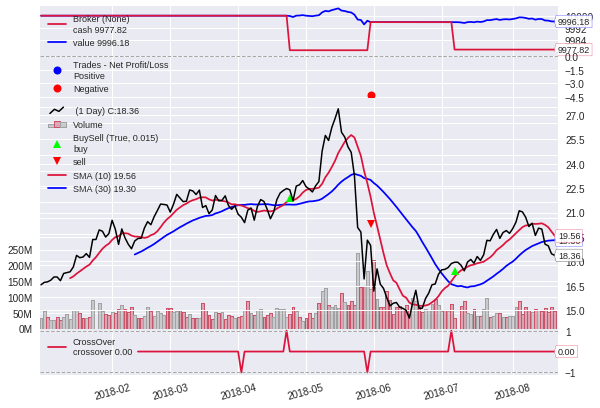

[[<matplotlib.figure.Figure at 0x7f6935d93208>]]

In [87]:

class SmaCross(bt.SignalStrategy):
  params = (('pfast', 10), ('pslow', 30),)
  def __init__(self):
    sma1, sma2 = bt.ind.SMA(period=self.p.pfast), bt.ind.SMA(period=self.p.pslow)
    self.signal_add(bt.SIGNAL_LONG, bt.ind.CrossOver(sma1, sma2))

cerebro = bt.Cerebro()

back = bt.feeds.PandasData(dataname=df, datetime=-1, open="1. open", high="2. high", low="3. low", close="4. close", volume="5. volume", openinterest=-1 )
cerebro.adddata(back)

cerebro.addstrategy(SmaCross)
cerebro.run()
cerebro.plot()
	